<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_20_Septiembre_(Metodo_Euler_Murayama).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# a) Usando el metodo de Euler-Murayama simule un millon de valores para Xs donde Xt cumple con la ecuacion:
#            dXt = M*Xt*dt + Sigma*Xt*dWt
# con M=0.007, Sigma=0.006, X0=10 y use Delta t=0.01
# Construya un histograma con los valores simulados
# ¿Que distribucion siguen? ¿Por que?

In [13]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev
from scipy.stats import norm
import random as rnd
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
from time import time
from numba import jit

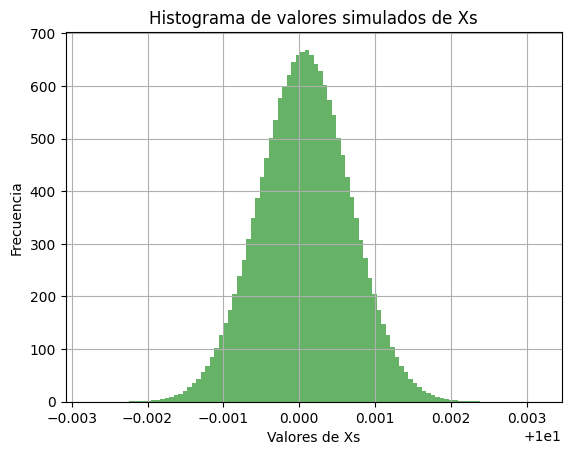

In [12]:

mu=0.007
sigma=0.006
x0=10
delta_t=0.01
N=1000000
l=[x0]

while N!=0:
  dWt=np.random.normal(0, sqrt(delta_t))
  xt = x0 + mu*delta_t + sigma*dWt
  l.append(xt)
  N-=1




#            dXt = M*Xt*dt + Sigma*Xt*dWt
#          Xt+Dt = Xt + Mu*deltaT + Sigma*DeltaWt
#  Dwt (0, raiz(DeltaT))
#  numero_aleatorio = np.random.normal(media, desviacion)



plt.hist(l, bins=100, density=True, alpha=0.6, color='g')
plt.title('Histograma de valores simulados de Xs')
plt.xlabel('Valores de Xs')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

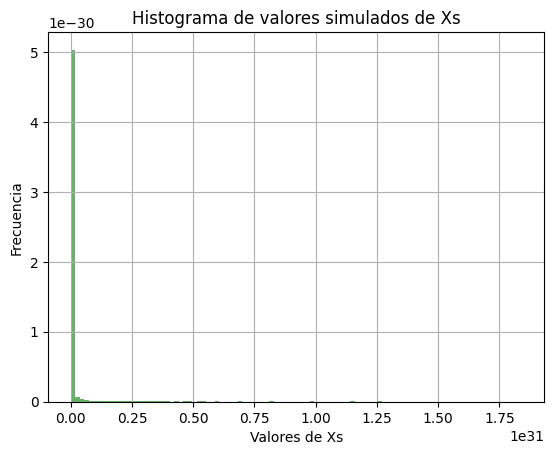

In [8]:
#import numpy as np
import matplotlib.pyplot as plt

# Parámetros
M = 0.007
Sigma = 0.006
X0 = 10
dt = 0.01
N = 1000000  # Número de simulaciones

# Inicializar el array para los valores de X
Xs = np.zeros(N)
Xs[0] = X0

# Simulación usando el método de Euler-Maruyama
for t in range(1, N):
    dWt = np.random.normal(0, np.sqrt(dt))  # Incremento de Wiener
    Xs[t] = Xs[t-1] + M * Xs[t-1] * dt + Sigma * Xs[t-1] * dWt

# Construir el histograma
plt.hist(Xs, bins=100, density=True, alpha=0.6, color='g')
plt.title('Histograma de valores simulados de Xs')
plt.xlabel('Valores de Xs')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

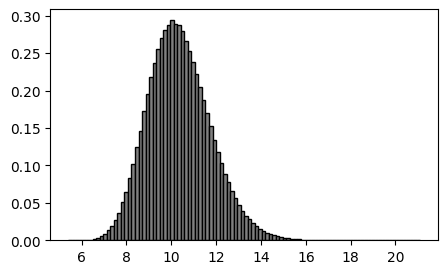

In [16]:
# Codigo profesor

@jit(nopython=True)
def euler(x0, u, o, delta, nr, T):
  l=np.zeros(nr)
  oo=sqrt(delta)
  for i in range(nr):
    x=x0
    t=0
    while t<T:
      x=x+u*x*delta+o*x*oo*gauss(0,1)
      t=t+delta
    l[i]=x
  return l

u=0.007
o=0.06
x00=10
delta=0.01
T=5
nr=1000000
l=euler(x00, u, o, delta, nr, T)
x2=np.max(l)
x1=min(l)
x=x1
b=[]
while x<x2:
  b.append(x)
  x=x+(x2-x1)/100


plt.figure(figsize=(5,3))
plt.hist(l, density=1, bins=b, color="grey", edgecolor="black")
plt.show()

In [17]:
# Codigo profesor

@jit(nopython=True)
def euler(x0, u, o, delta, nr, T):
  l=np.zeros(nr)
  oo=sqrt(delta)
  for i in range(nr):
    x=x0
    t=0
    while t<T:
      x=x+u*x*delta+o*x*oo*gauss(0,1)
      t=t+delta
    l[i]=x
  return l

u=0.007
o=0.06
x00=10
delta=0.01
T=5
nr=1000000
l=euler(x00, u, o, delta, nr, T)
x2=np.max(l)
x1=min(l)
x=x1
b=[]
while x<x2:
  b.append(x)
  x=x+(x2-x1)/100
par=lognorm.fit(l)
print(par)
s=par[0]
loc=par[1]
scale=par[2]
par1=norm.fit(l)
u=par1[0]
o=par1[1]
ks=kstest(l, "norm", arg=(u,o))
print(ks)
ks1=kstest(l, "lognorm", arg(s, loc, scale))
print(ks1)
lt=[]
ltn=[]
for x in b:
  lt.append(lognorm.pdf(x,s,loc,scale))
  ltn.append(norm.pdf(x,u,o))

#plt.figure(figsize=(5,3))

plt.hist(l, density=1, bins=b, color="grey", edgecolor="black", label="Datos")
plt.plot(b, lt, color="red", lw=2,label="lognormal")
plt.plot(b, ltn, color="blue", lw=2, label="normal")
plt.show()

NameError: name 'lognorm' is not defined